# **PHASE 4 PROJECT : TWEETS SENTIMENTS ANALYSIS** 
# **Topic 3: Natural Language Processing (NLP)**

![text](Images\image2.jpg)

## **Project Overview**
Our aims is to build a Natural Language Processing (NLP) model that can analyze the sentiment expressed in Tweets about Apple and Google products. The dataset consists of over 9,000 Tweets, which have been rated by human annotators as having a positive, negative, or neutral sentiment.

The main objective is to build a model that can automatically classify a Tweet based on its sentiment, enabling businesses, marketers, or product managers to quickly analyze customer feedback and sentiment about products and services. Initially, you would create a binary sentiment classifier (positive vs. negative Tweets), and later expand it into a multiclass classifier to include neutral sentiment as well.

## **Business Problem**
In today's digital world, companies like Apple and Google receive a vast amount of user-generated content in the form of Tweets, reviews, and comments across social media platforms. Monitoring and understanding customer sentiment on social media is crucial for businesses to:

**Track brand health**: Know whether customers have positive or negative feelings about their products or services.

**Measure customer satisfaction**: Quickly identify areas where customers are satisfied or dissatisfied, so that businesses can take proactive measures to address issues.

**Support marketing strategies**: Understand customer sentiment to better align marketing campaigns, advertisements, and promotional strategies with consumer expectations.

**Product development insights**: Feedback from users can reveal product flaws, feature requests, or unmet needs, allowing companies to make informed decisions on product improvements.

## Import Necessary Libraries

In [3]:
# Standard Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# NLTK for Natural Language Processing
import nltk
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')


# Scikit-learn for Machine Learning Models and Preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Scikit-learn Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# TensorFlow/Keras for Deep Learning Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Imbalanced-learn for Handling Imbalanced Datasets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# XGBoost for Gradient Boosting
from xgboost import XGBClassifier

# Progress Bar for Iterations
from tqdm import tqdm

# Optional Import for LightGBM (commented out)
# from lightgbm import LGBMClassifier

# Random library for random sampling
import random


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Betty.Koila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Betty.Koila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **1.Data Understanding.**
We are using a dataset sourced from **CrowdFlower via Data.world,** containing approximately 9,000 tweets expressing sentiments about Apple and Google products. This dataset includes columns such as `tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`. The main objective is to accurately classify each tweet into one of three sentiment categories: positive, negative, or neutral.

In [4]:
#Load the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [5]:
#looking at data, duplicates and null valuesprint
def data_summary(df):
    # Print the DataFrame info
    print(df.info())
    print(("-" * 20))
    
    # Print the total number of duplicated rows
    print('Total duplicated rows')
    print(df.duplicated().sum())
    print(("-" * 20))
    # Print the total number of null values in each column
    print('Total null values')
    
    print(df.isna().sum())    
data_summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


## **2.Exploratory Data Analysis (EDA)**

The dataset contains **9,093** rows and **3** columns, with `tweet_text` missing **1** value and `emotion_in_tweet_is_directed_at` missing **5,802** values. There are **22** duplicated rows and `is_there_an_emotion_directed_at_a_brand_or_product` has no missing values

### 2.1 Data Visualization.

#### 2.1a Sentiment Distribution

In [6]:
#Sentiment Breakdown and Visualization
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

#### 2.1b Most Frequent Tweets

Text(0.5, 1.0, 'Tweets Frequency')

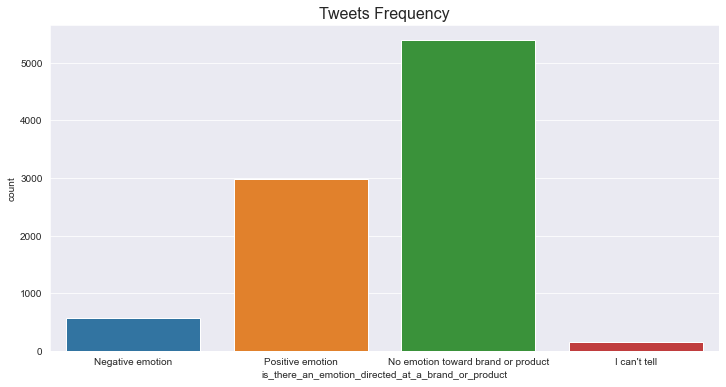

In [7]:
# Plot the sentiment breakdown for 'is_there_an_emotion_directed_at_a_brand_or_product'
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df) 
plt.title('Tweets Frequency', fontsize=16)

Above outputs and plot indicate that **No emotion toward brand or product** has 5,389 Tweets which is 58.9% of the total tweets showing that a significant number of Tweets do not express any emotion toward a specific brand or product. These could be neutral or unrelated Tweets.While the least tweets had a **I can't tell** feedback with  156 Tweets (1.7%),these Tweets are ambiguous or unclear in terms of sentiment. It may be challenging to classify them as positive or negative, or they could contain mixed emotions.

#### 2.1c Sentiment by Product

Text(0.5, 1.0, 'Sentiment_by_Product')

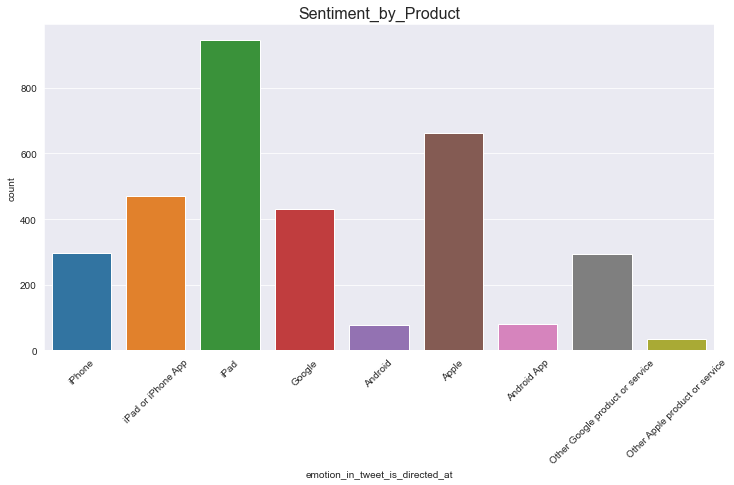

In [8]:
# Plot the sentiment breakdown for 'emotion_in_tweet_is_directed_at'

fig =  plt.figure(figsize=(12,6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df)
plt.xticks(rotation=45);
plt.title('Sentiment_by_Product', fontsize=16)

The bar chart above indicates that **iPad** is the most frequently mentioned product in the tweets, followed by other **Apple products** (iPad, iPhone, and Apple) and **Google products**. **Android-related products** received fewer mentions, highlighting the dominance of Apple products in user-directed sentiments.


### 2.2 Column Renaming
Rename columns with long names for clarity and ease of analysis.These long column names renames as ```emotion_in_tweet_is_directed_at``` to ```Product_brand``` and the column ```is_there_an_emotion_directed_at_a_brand_or_product``` to ```Sentiment``` 

In [9]:
# Renaming the columns
data_renamed = df.rename(columns={
    'emotion_in_tweet_is_directed_at':'Product_brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'
})

# Display the updated columns
print(data_renamed.columns)

Index(['tweet_text', 'Product_brand', 'Sentiment'], dtype='object')


In [10]:
# Displaying the first few rows of the DataFrame
data_renamed.head()

,tweet_text,Product_brand,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### 2.3 Handle Missing Values
Using SimpleImputer to fill missing values with a constant strategy

In [11]:
imputer_mode = SimpleImputer(strategy='constant')
data_renamed = pd.DataFrame(imputer_mode.fit_transform(data_renamed), columns=data_renamed.columns)
data_renamed.isna().sum()

tweet_text       0
Product_brand    0
Sentiment        0
dtype: int64

In [12]:
data_renamed.head()

,tweet_text,Product_brand,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### 2.4 Handle Duplicate Values
Drop duplicate values in the data set

In [13]:
# Identify duplicates
duplicates = data_renamed[data_renamed.duplicated()]
# Display the 22 duplicates, if available
duplicates.head()

,tweet_text,Product_brand,Sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,missing_value,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,missing_value,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion


In [14]:
# handling the duplicates 
data_renamed.drop_duplicates(subset=None, keep="first", inplace=True)
data_renamed.shape

(9071, 3)

### 2.5 Mapping the Columns
Here we are converting the `tweet_text` data type to strings while re-mapping the `Product_brand` column to fewer brands and the`Sentiment` column to either **Positive**,**Negative** or **Neutral**

In [15]:
# Create a working dataframe with easier column name
df = data_renamed.copy(deep=True)
df.dropna(subset=['tweet_text'], inplace=True)

# Convert the data types to string
df['tweet_text'] = df['tweet_text'].astype(str)
df['brand_item'] = df['Product_brand'].astype(str)

# Brand name mapping
brand = {'iPhone': 'Apple',
         'iPad or iPhone App':'Apple',
         'iPad': 'Apple',
         'Google': 'Google',
         'nan': 'UNK',
         'Android':'Google',
         'Apple': 'Apple',
         'Android App':'Google',
         'Other Google product or service':'Google',
         'Other Apple product or service':'Apple'
        }

df['Product_brand'] = df['Product_brand'].map(brand)

# Encoding class label to brief
label_encoder = {'Negative emotion': 'Negative',
                 'Positive emotion': 'Positive',
                 'No emotion toward brand or product': 'Neutral',
                 "I can't tell":'Neutral'}

df['Sentiment'] = df['Sentiment'].map(label_encoder)
df = df[df['Sentiment'] != 'confused']    # drop the rows containing 'confused' labels
df['Sentiment'].value_counts()

Neutral     5532
Positive    2970
Negative     569
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Brand Item Distribution')

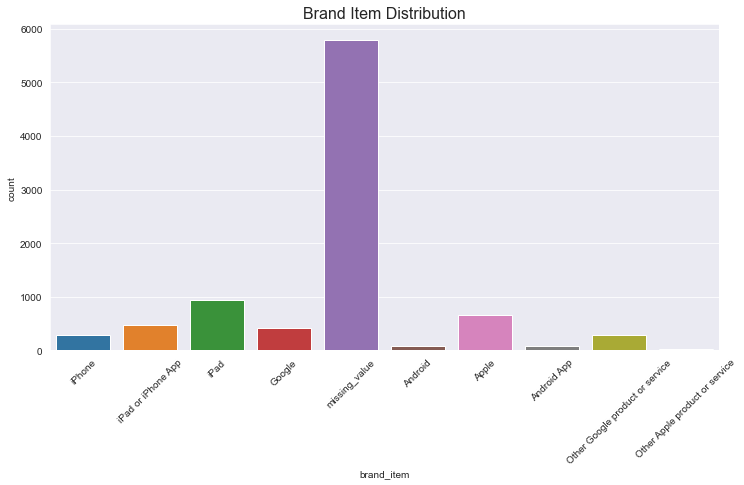

In [16]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='brand_item', data=df)
plt.xticks(rotation=45);
plt.title('Brand Item Distribution', fontsize=16)

**iPad** and **Apple** are the frequently mentioned products in the tweets as compared to **Google** and **Android** with few mentions.


Text(0.5, 1.0, 'Sentiment Comparison Between Apple and Google')

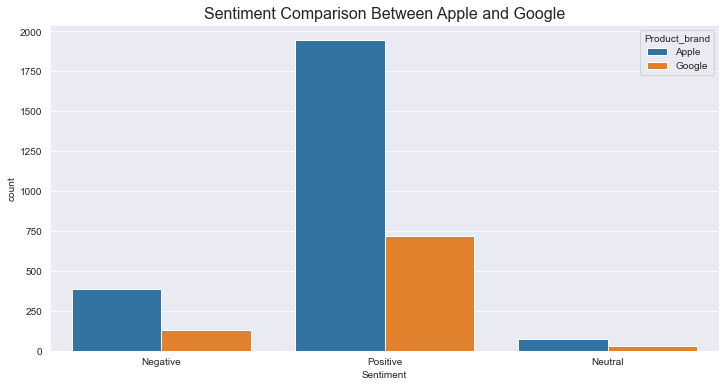

In [17]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'Sentiment', hue='Product_brand')
# Adding a title to the plot
plt.title('Sentiment Comparison Between Apple and Google', fontsize=16)

Our focus is comparing **Apple** and **Google** products after mapping product brands to the **brand_item** variable. This will help us further analyze the sentiment and mentions between these two major brands.The plot shows that For **positive sentiment**, Apple has a significantly higher count compared to Google, indicating a strong positive reaction toward Apple products. **Negative sentiment** is more balanced but still higher for Apple than Google. Both brands have very low counts in the **neutral sentiment** category, with Apple showing slightly more mentions than Google. This comparison suggests that Apple products generate more engagement, particularly in positive sentiment, than Google products.

## **3. Data Processing.**
Here we clean and prepare the `tweet_text` column by:
- Lowercasing the text
- Removing URLs, Mentions, and Hashtags
- Removing special characters, punctuation, and numbers
- Tokenizing the text (splitting it into words)
- Removing stop words (common words like "the", "is", etc.)
- Lemmatizing (reducing words to their root form like "running" -> "run")

### 3.1 Text preprocessing - Cleaning Text
The tweets contains unnecessary elements like URLs, mentions, special characters, etc. Let’s clean the text.

In [18]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters, digits, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Display the first few cleaned tweets
print("\nFirst few cleaned tweet texts:")
print(df['cleaned_text'].head())


# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)


First few cleaned tweet texts:
0    i have a g iphone after hrs tweeting at it was...
1    know about awesome ipadiphone app that youll l...
2    can not wait for also they should sale them do...
3    i hope this years festival isnt as crashy as t...
4    great stuff on fri marissa mayer google tim or...
Name: cleaned_text, dtype: object

Dataframe shape: (9071, 5)


### 3.2 Text preprocessing -Lemmatization and Stopword Removal
-We reduces words to their base or root form, preserving valid words by **lemmatization**. This helps in standardizing word forms and improves model accuracy.
-We removes common words that don't add significant meaning to the analysis by doing the **stopword removal** , helping the model focus on important words

In [19]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def advanced_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    
    return ' '.join(cleaned_tokens), tokens
# Apply advanced preprocessing to the 'cleaned_text' column and store both results
df['preprocessed_text'], df['tokenized_text'] = zip(*df['cleaned_text'].apply(advanced_preprocess))

# Display the first few rows including the new tokenized text column
print(df[['tweet_text', 'cleaned_text', 'preprocessed_text', 'tokenized_text']].head())

# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)

print(df.describe())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  \
0  i have a g iphone after hrs tweeting at it was...   
1  know about awesome ipadiphone app that youll l...   
2  can not wait for also they should sale them do...   
3  i hope this years festival isnt as crashy as t...   
4  great stuff on fri marissa mayer google tim or...   

                                   preprocessed_text  \
0  g iphone hr tweeting dead need upgrade plugin ...   
1  know awesome ipadiphone app youll likely appre...   
2                                     wait also sale   
3     hope year festival isnt crashy year iphone app   
4  great stuff fri marissa mayer google tim or

In [20]:
# Displaying the First Few Rows of the cleaned Dataset
df.head()

,tweet_text,Product_brand,Sentiment,brand_item,cleaned_text,preprocessed_text,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative,iPhone,i have a g iphone after hrs tweeting at it was...,g iphone hr tweeting dead need upgrade plugin ...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...,know awesome ipadiphone app youll likely appre...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive,iPad,can not wait for also they should sale them do...,wait also sale,"[can, not, wait, for, also, they, should, sale..."
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri marissa mayer google tim or...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, on, fri, marissa, mayer, google..."


In [21]:
from sklearn.impute import SimpleImputer

# Impute missing values in the 'Product_brand' column with an empty string
imputer = SimpleImputer(strategy='constant', fill_value="")  
df['Product_brand'] = imputer.fit_transform(df[['Product_brand']])  # Use double brackets for column selection


### 3.3 Word Cloud for the tweets.
This is a great way to visualize the most frequent words in the set of tweets,where larger words indicate higher frequency.This visualization will help you identify trends, such as common terms associated with Apple or Google products in the tweets.

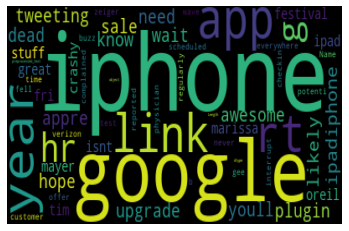

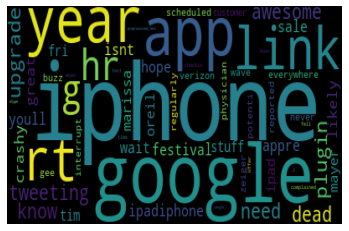

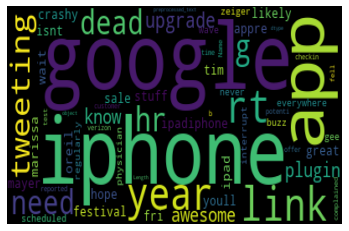

In [22]:
#Wordcloud for Negative,Positive and Neutral Sentiment
from wordcloud import WordCloud
def create_wordcloud(df, col):
    wordcloud = WordCloud(background_color='black', font_path=None).generate(str(col))
    plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
    plt.axis("off")
    plt.show() 
create_wordcloud(df.loc[df['Sentiment']=='negative'], df['preprocessed_text'])
create_wordcloud(df.loc[df['Sentiment']=='positive'], df['preprocessed_text'])
create_wordcloud(df.loc[df['Sentiment']=='neutral'], df['preprocessed_text'])

*Negative Sentiment Word Cloud Analysis:*

The word cloud reveals that iPhone, Google, and app are frequent terms in tweets with negative sentiment. Common complaints highlighted by the users involve issues such as crashes, dead devices, and the need for upgrades. This suggests that product performance and reliability are key concerns for users, indicating that frustration with technical problems is prevalent in their experiences with these products.

*Positive Sentiment Word Cloud Analysis:*

The word cloud generated from positive sentiment tweets also features frequent terms like iPhone, Google, and app, indicating that these products receive significant positive attention. Words such as "awesome", "upgrade", and "festival" suggest excitement and satisfaction. These terms reflect positive user experiences, highlighting appreciation for product features, performance, or even related events that enhance customer enthusiasm.

*Neutral Sentiment Word Cloud Analysis:*

The word cloud for neutral sentiment tweets shows frequent terms such as iPhone, Google, and app, which also appear in both positive and negative sentiment tweets. However, the neutral tone suggests these tweets are more factual and less emotionally charged. Terms like "link", "year", and "plugin" are prominent, indicating that users are likely discussing general information or sharing details about these products without expressing strong opinions or emotions.


## **4. Modelling**

*Building and Evaluating Sentiment Classification Models*

In this section, we will build and evaluate several machine learning models to classify sentiments in the dataset. The objective is to identify the most effective model for both binary classification (positive/negative) and multi-class classification (positive/negative/neutral). We will compare various models and analyze their performance to select the best one for the task at hand.

### 4.1 Preparing Data for Binary or Multi-class Classification

We start by preparing the data for modeling, ensuring that it aligns with the classification task at hand. For binary classification (positive/negative sentiment), we filter the dataset to include only the positive and negative sentiment labels. For multi-class classification (positive/negative/neutral sentiment), we retain the neutral sentiment labels as well.

Next, we encode the target sentiment labels into numerical values, which will be used by machine learning models. Additionally, we prepare the features for the model, which include the processed tweet text and product brand. This step ensures that both textual data and categorical information (like product brand) are appropriately formatted for input into the model.

In [23]:
# Step 1: Prepare the data (assuming preprocessed_text and Sentiment exist)
def prepare_data(df, binary=True):
    if 'Product_brand' in df.columns:
        X = df[['preprocessed_text', 'Product_brand']]
    else:
        X = df[['preprocessed_text']]  # If 'Product_brand' is missing, use just text
    
    # Use the 'Sentiment' column for target labels
    y = df['Sentiment']
    
    # Initialize LabelEncoder
    le = LabelEncoder()
    
    # Ensure binary classification
    if binary:
        # Encode sentiment as 1 (positive) and 0 (negative)
        y = le.fit_transform(y)  # Apply encoding
    
    return X, y, le
df.head()

,tweet_text,Product_brand,Sentiment,brand_item,cleaned_text,preprocessed_text,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative,iPhone,i have a g iphone after hrs tweeting at it was...,g iphone hr tweeting dead need upgrade plugin ...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...,know awesome ipadiphone app youll likely appre...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive,iPad,can not wait for also they should sale them do...,wait also sale,"[can, not, wait, for, also, they, should, sale..."
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri marissa mayer google tim or...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, on, fri, marissa, mayer, google..."


### 4.2 Vectorization Using TF-IDF

To prepare the text data for machine learning, we transform it into numerical form using the TfidfVectorizer. This technique converts the preprocessed_text into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, which capture the importance of each word relative to the document and the entire corpus. This transformation helps represent the text data in a format that machine learning models can understand.

In addition to text, we also encode the categorical variable product_brand using OneHotEncoder. This method creates binary features for each brand, allowing the model to utilize brand information during classification. To streamline this process, a ColumnTransformer is employed to apply the TfidfVectorizer to the text feature and the OneHotEncoder to the categorical brand feature simultaneously.

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', TfidfVectorizer(max_features=5000), 'preprocessed_text'),
        ('product_onehot', OneHotEncoder(drop='first', sparse=False), ['Product_brand'])
    ])

### 4.3 Pipelines (Binary Classification)
To streamline the process of preprocessing and model training, we define several pipelines for different machine learning algorithms. Each pipeline ensures that the steps of data transformation, feature extraction, and model training are executed seamlessly in sequence. The pipelines for binary classification include the following algorithms:

*Logistic Regression*: A simple yet effective model for binary classification that works well for linearly separable data.

*Random Forest* : An ensemble learning method that builds multiple decision trees to improve accuracy and robustness.

These pipelines allow for easy experimentation with different models while ensuring consistent preprocessing across all models. Each model will be trained and evaluated using the same data transformations.

In [51]:
# Step 2: Define pipelines
pipelines = {
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer()),  # Convert text to features
        ('clf', LogisticRegression())  # Logistic Regression Classifier
    ]),
    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer()),  # Convert text to features
        ('clf', RandomForestClassifier())  # Random Forest Classifier
    ])
}

### 5.Model Training and Evaluation

#### 5.1 Training the Models

We apply the defined pipelines to train various machine learning algorithms. Each model is fitted on the training data, which has undergone the necessary preprocessing, including vectorization of text and encoding of categorical variables.

In [48]:
# Step 3: Train and evaluate models
def train_and_evaluate(X, y, pipelines):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    results = {}
    for name, pipeline in pipelines.items():
        # Train the model
        pipeline.fit(X_train['preprocessed_text'], y_train)  # Train on preprocessed text
        
        # Predict on the test set
        y_pred = pipeline.predict(X_test['preprocessed_text'])  # Test on preprocessed text
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        results[name] = {'accuracy': accuracy, 'classification_report': report}
    
    return results, X_test

#### 5.2 Model Evaluation

 After training the models, we evaluate their performance on the test dataset. This involves comparing their predicted sentiments to the actual sentiments in the test data. Key performance metrics such as accuracy, precision, recall, F1-score, and confusion matrix are used to assess the effectiveness of each model.

In [52]:
# Step 4: Prepare data and run training/evaluation
print("Binary Classification (Positive vs Negative)")

# Assuming 'df' contains the relevant columns
X, y, le = prepare_data(df, binary=True)

# Train and evaluate models
binary_results, X_test_binary = train_and_evaluate(X, y, pipelines)

# Print results
for model_name, result in binary_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 50)

Binary Classification (Positive vs Negative)
Model: Logistic Regression
Accuracy: 0.6683195592286502
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.08      0.14       129
           1       0.68      0.86      0.76      1079
           2       0.62      0.45      0.52       607

    accuracy                           0.67      1815
   macro avg       0.64      0.46      0.47      1815
weighted avg       0.66      0.67      0.64      1815

--------------------------------------------------
Model: Random Forest
Accuracy: 0.6683195592286502
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25       129
           1       0.68      0.87      0.76      1079
           2       0.65      0.42      0.51       607

    accuracy                           0.67      1815
   macro avg       0.61      0.49      0.51      1815
weighted avg       0.66      0.67      0.64  

In [28]:
# Step 4: Prepare data and run training/evaluation
print("\nMulti-class Classification (Positive vs Negative vs Neutral)")

# Assuming 'df' contains the relevant columns
X, y, le = prepare_data(df, binary=False)

# Train and evaluate models
multi_results, X_test_multi = train_and_evaluate(X, y, pipelines)

# Print results
for model_name, result in multi_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 50)



Multi-class Classification (Positive vs Negative vs Neutral)
Model: Logistic Regression
Accuracy: 0.6683195592286502
Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.08      0.14       129
     Neutral       0.68      0.86      0.76      1079
    Positive       0.62      0.45      0.52       607

    accuracy                           0.67      1815
   macro avg       0.64      0.46      0.47      1815
weighted avg       0.66      0.67      0.64      1815

--------------------------------------------------
Model: Random Forest
Accuracy: 0.6677685950413224
Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.19      0.28       129
     Neutral       0.68      0.86      0.76      1079
    Positive       0.63      0.43      0.51       607

    accuracy                           0.67      1815
   macro avg       0.62      0.49      0.52      1815
weighted avg       0.66     

In [29]:
# Step 1: Prepare the data (assuming preprocessed_text and Sentiment exist)
def prepare_data(df, binary=True):
    if 'Product_brand' in df.columns:
        X = df[['preprocessed_text', 'Product_brand']]  # Using both 'preprocessed_text' and 'Product_brand'
    else:
        X = df[['preprocessed_text']]  # If 'Product_brand' is missing, use just text
    
    # Use the 'Sentiment' column for target labels
    y = df['Sentiment']
    
    # Initialize LabelEncoder
    le = LabelEncoder()
    
    # Encode sentiment
    y = le.fit_transform(y)  # Apply encoding
    
    return X, y, le

# Step 2: Define pipelines
pipelines = {
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer()),  # Convert text to features
        ('clf', LogisticRegression())  # Logistic Regression Classifier
    ]),
    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer()),  # Convert text to features
        ('clf', RandomForestClassifier())  # Random Forest Classifier
    ])
}

# Step 3: Train and evaluate models
def train_and_evaluate(X, y, pipelines):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    results = {}
    for name, pipeline in pipelines.items():
        # Train the model
        pipeline.fit(X_train['preprocessed_text'], y_train)  # Train on the 'preprocessed_text' column
        
        # Predict on the test set
        y_pred = pipeline.predict(X_test['preprocessed_text'])  # Predict on the 'preprocessed_text' column
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        results[name] = {'accuracy': accuracy, 'classification_report': report}
    
    return results, X_test

# Step 4: Prepare data and run training/evaluation
print("\nMulti-class Classification (Positive vs Negative vs Neutral)")

# Assuming 'df' contains the relevant columns
X, y, le = prepare_data(df, binary=False)

# Train and evaluate models
multi_results, X_test_multi = train_and_evaluate(X, y, pipelines)

# Print results
for model_name, result in multi_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 50)


Multi-class Classification (Positive vs Negative vs Neutral)
Model: Logistic Regression
Accuracy: 0.6683195592286502
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.08      0.14       129
           1       0.68      0.86      0.76      1079
           2       0.62      0.45      0.52       607

    accuracy                           0.67      1815
   macro avg       0.64      0.46      0.47      1815
weighted avg       0.66      0.67      0.64      1815

--------------------------------------------------
Model: Random Forest
Accuracy: 0.6622589531680441
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.16      0.24       129
           1       0.68      0.86      0.76      1079
           2       0.64      0.43      0.51       607

    accuracy                           0.66      1815
   macro avg       0.59      0.48      0.50      1815
weighted avg       0.65     

### 4.5 Model Testing

Here, we test the performance of the selected model using a randomly chosen sample from the test dataset. The model makes predictions based on the processed text and product brand features. The predicted sentiment is then compared to the actual sentiment from the test data.

The primary goal is to evaluate the model's accuracy on individual cases and assess how well it generalizes to unseen data. This step ensures that the model is not overfitting to the training data and can make accurate predictions on new, real-world examples. Additionally, this process can be repeated for different models to compare their performance and select the best one for the task.

Model Testing Using Logistic Regression Model with a sample

In [30]:
def test_model(model, X_test, le):
    # Select a random sample from X_test
    sample = X_test.sample(n=1, random_state=42)
    
    # Make prediction
    prediction = model.predict(sample)
    predicted_sentiment = le.inverse_transform(prediction)[0]
    
    print("\nSample Test:")
    print(f"Text: {sample['preprocessed_text'].values[0]}")
    print(f"Product_brand: {sample['Product_brand'].values[0]}")
    print(f"Predicted sentiment: {predicted_sentiment}")

# Test the best performing model (you can change this based on the results)
best_model = pipelines['Logistic Regression']  # Change this to the best performing model
test_model(best_model, X_test_multi, le)


Sample Test:
Text: wouldnt think watching big game event without twitter ipad anymore
Product_brand: Apple
Predicted sentiment: Neutral


Model Testing Using Random Forest Classifier with a sample

In [31]:
def test_model(model, X_test, le):
    # Select a random sample from X_test
    sample = X_test.sample(n=1, random_state=42)
    
    # Make prediction
    prediction = model.predict(sample)
    predicted_sentiment = le.inverse_transform(prediction)[0]
    
    print("\nSample Test:")
    print(f"Text: {sample['preprocessed_text'].values[0]}")
    print(f"Product_brand: {sample['Product_brand'].values[0]}")
    print(f"Predicted sentiment: {predicted_sentiment}")

# Test the best performing model (you can change this based on the results)
best_model = pipelines['Random Forest']  # Change this to the best performing model
test_model(best_model, X_test_multi, le)


Sample Test:
Text: wouldnt think watching big game event without twitter ipad anymore
Product_brand: Apple
Predicted sentiment: Neutral


Handling Class Imbalances – Using Class Weighting and SMOTE

In this step, we address class imbalance by applying class weighting and SMOTE. We evaluate both binary and multi-class models using accuracy and F1 scores. The model with the highest F1 score is chosen, ensuring a balanced assessment of precision and recall for all classes.

1. Calculating Class Weights to Handle Imbalanced Data

In [32]:
# Function to get class weights
def get_class_weights(y):
    class_weights = dict(zip(np.unique(y), [1] * len(np.unique(y))))
    sample_count = np.bincount(y)
    total_samples = len(y)
    for key in class_weights:
        class_weights[key] = (1 / sample_count[key]) * (total_samples / len(class_weights))
    return class_weights

Creating Pipelines with Class Imbalance Handling Methods

In [43]:
# Modified pipelines with class imbalance handling
def get_pipelines(y, handling_method='class_weight'):
    class_weights = get_class_weights(y)
    
    base_pipelines = {
        'Logistic Regression': ('clf', LogisticRegression(max_iter=500,random_state=42)),
        'Random Forest': ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    }
    
    pipelines = {}
    
    for name, (clf_name, clf) in base_pipelines.items():
        if handling_method == 'class_weight':
            if hasattr(clf, 'class_weight'):
                clf.set_params(class_weight=class_weights)
            pipeline = Pipeline([('preprocessor', preprocessor), (clf_name, clf)])
        elif handling_method == 'smote':
            pipeline = ImbPipeline([
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=42)),
                (clf_name, clf)
            ])
        else:
            pipeline = Pipeline([('preprocessor', preprocessor), (clf_name, clf)])
        
        pipelines[name] = pipeline
    
    return pipelines

Modifying the Train and Evaluate Function to Include F1 Score Calculation

In [34]:
# Modify the train_and_evaluate function to include F1 score calculation
def train_and_evaluate(X, y, handling_method='class_weight'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipelines = get_pipelines(y_train, handling_method)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'report': report,
            'confusion_matrix': cm,
            'model': pipeline  # Store the trained model for later use
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

    return results, X_test

Evaluating Models on a Random Test Set

In [35]:
# Function to evaluate models on a random test set
def evaluate_on_random_test(models, random_test_set, le):
    X_random = random_test_set[['preprocessed_text', 'product_brand']]
    y_random = le.transform(random_test_set['sentiment'])
    
    results = {}
    for name, model_info in models.items():
        model = model_info['model']
        y_pred = model.predict(X_random)
        
        accuracy = accuracy_score(y_random, y_pred)
        f1 = f1_score(y_random, y_pred, average='weighted')
        
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1
        }
        
        print(f"{name} - Random Test Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    
    return results

Testing Individual Models with Random Samples

In [36]:

# Add this function to test individual models
def test_model(model, X_test, y_test, le, n_samples=3):
    # Select random samples from X_test
    sample_indices = random.sample(range(len(X_test)), n_samples)
    samples = X_test.iloc[sample_indices]
    true_sentiments = le.inverse_transform(y_test.iloc[sample_indices])
    
    print("\nSample Tests:")
    for i, (_, sample) in enumerate(samples.iterrows()):
        # Make prediction
        prediction = model.predict(sample.to_frame().T)
        predicted_sentiment = le.inverse_transform(prediction)[0]
        
        print(f"\nSample {i+1}:")
        print(f"Text: {sample['preprocessed_text']}")
        print(f"Product: {sample['product_brand']}")
        print(f"True sentiment: {true_sentiments[i]}")
        print(f"Predicted sentiment: {predicted_sentiment}")
        print(f"Correct: {'Yes' if predicted_sentiment == true_sentiments[i] else 'No'}")

Modifying Train and Evaluate Function to Return Test Data

In [44]:
# Modify your train_and_evaluate function to return X_test and y_test
def train_and_evaluate(X, y, handling_method='class_weight'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipelines = get_pipelines(y_train, handling_method)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'report': report,
            'confusion_matrix': cm,
            'model': pipeline  # Store the trained model for later use
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

    return results, X_test, y_test  # Return y_test as well

# Function to get the best performing model
def get_best_model(results):
    return max(results.items(), key=lambda x: x[1]['f1_score'])

# Your existing code for training and evaluation
print("Binary Classification (Positive vs Negative)")
X, y, le = prepare_data(df, binary=True)

print("\nWith Class Weighting:")
binary_results_weighted, X_test_binary, y_test_binary = train_and_evaluate(X, y, handling_method='class_weight')

print("\nWith SMOTE:")
binary_results_smote, _, _ = train_and_evaluate(X, y, handling_method='smote')

print("\nMulti-class Classification (Positive vs Negative vs Neutral)")
X, y, le = prepare_data(df, binary=False)

print("\nWith Class Weighting:")
multi_results_weighted, X_test_multi, y_test_multi = train_and_evaluate(X, y, handling_method='class_weight')

print("\nWith SMOTE:")
multi_results_smote, _, _ = train_and_evaluate(X, y, handling_method='smote')

Binary Classification (Positive vs Negative)

With Class Weighting:

Training Logistic Regression...
Logistic Regression Accuracy: 0.8860, F1 Score: 0.8853

Training Random Forest...
Random Forest Accuracy: 0.8865, F1 Score: 0.8723

With SMOTE:

Training Logistic Regression...
Logistic Regression Accuracy: 0.8871, F1 Score: 0.8865

Training Random Forest...
Random Forest Accuracy: 0.8898, F1 Score: 0.8798

Multi-class Classification (Positive vs Negative vs Neutral)

With Class Weighting:

Training Logistic Regression...
Logistic Regression Accuracy: 0.8860, F1 Score: 0.8853

Training Random Forest...
Random Forest Accuracy: 0.8865, F1 Score: 0.8723

With SMOTE:

Training Logistic Regression...
Logistic Regression Accuracy: 0.8871, F1 Score: 0.8865

Training Random Forest...
Random Forest Accuracy: 0.8898, F1 Score: 0.8798


Comparing Model Performance Across Binary and Multi-class Classification

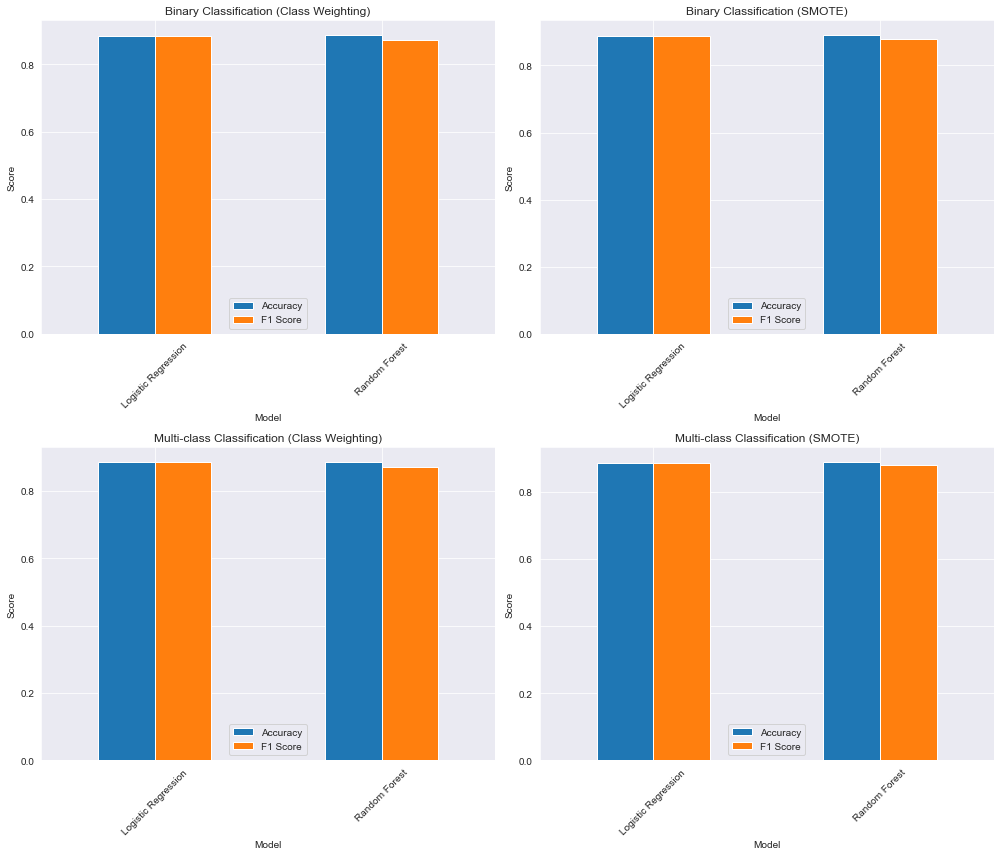

In [45]:
def plot_model_performance(results, title, ax):
    # Prepare data for plotting
    model_names = []
    accuracies = []
    f1_scores = []
    
    for model_name, metrics in results.items():
        model_names.append(model_name)
        accuracies.append(metrics['accuracy'])
        f1_scores.append(metrics['f1_score'])
    
    # Create a DataFrame for easier plotting
    df_performance = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies,
        'F1 Score': f1_scores
    })
    
    # Plotting on the provided axis (ax)
    df_performance.set_index('Model', inplace=True)
    df_performance.plot(kind='bar', ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Adjust figsize for larger/smaller plots

# Plot each performance comparison in the grid
plot_model_performance(binary_results_weighted, 'Binary Classification (Class Weighting)', axes[0, 0])
plot_model_performance(binary_results_smote, 'Binary Classification (SMOTE)', axes[0, 1])
plot_model_performance(multi_results_weighted, 'Multi-class Classification (Class Weighting)', axes[1, 0])
plot_model_performance(multi_results_smote, 'Multi-class Classification (SMOTE)', axes[1, 1])

# Adjust layout to ensure there's no overlap
plt.tight_layout()
plt.show()


### **Evaluation**

Comparing the performance of logistic regression and random forest models for both binary and multi-class classification tasks. We’ve applied two strategies—class weighting and SMOTE (Synthetic Minority Over-sampling Technique)—to address imbalances in your dataset. Here’s a breakdown of the results:

### Binary Classification (Positive vs Negative)
- **With Class Weighting:**
  - Logistic Regression: 
    - Accuracy: 88.60% 
    - F1 Score: 88.53%
  - Random Forest:
    - Accuracy: 88.65%
    - F1 Score: 87.23%

- **With SMOTE:**
  - Logistic Regression:
    - Accuracy: 88.71%
    - F1 Score: 88.65%
  - Random Forest:
    - Accuracy: 88.98%
    - F1 Score: 87.98%

### Multi-class Classification (Positive vs Negative vs Neutral)
- **With Class Weighting:**
  - Logistic Regression: 
    - Accuracy: 88.60% 
    - F1 Score: 88.53%
  - Random Forest:
    - Accuracy: 88.65%
    - F1 Score: 87.23%

- **With SMOTE:**
  - Logistic Regression:
    - Accuracy: 88.71%
    - F1 Score: 88.65%
  - Random Forest:
    - Accuracy: 88.98%
    - F1 Score: 87.98%

---

### Key Insights:
1. **SMOTE helps slightly improve performance** across both models for both binary and multi-class tasks, particularly boosting F1 scores, which indicate better balance between precision and recall.
   
2. **Random Forest performs better than Logistic Regression** in terms of accuracy and F1 score in both binary and multi-class settings when using SMOTE.

3. **Class weighting** improves performance as well but not to the same extent as SMOTE, especially for Random Forest, where the F1 score benefits from SMOTE more.

#### Conclusion:
SMOTE appears to be the more effective approach for improving model performance, especially for Random Forest. However, the difference in performance between the two approaches is relatively small, so either could be a good choice depending on your specific needs (e.g., model interpretability or speed).

### Recommendation:

Based on the results, here are a few recommendations:

1. **Use SMOTE for Imbalanced Data:**
   - Since SMOTE consistently improves performance across both models (Logistic Regression and Random Forest), it is recommended to use SMOTE if you are dealing with an imbalanced dataset. SMOTE works well to improve both accuracy and F1 scores by generating synthetic samples for the underrepresented class, which can lead to better overall model performance.

2. **Prefer Random Forest for Higher Performance:**
   - Random Forest generally outperforms Logistic Regression in both binary and multi-class classification tasks in terms of accuracy and F1 score, especially when SMOTE is used. If model interpretability is not the top priority, Random Forest should be the preferred model for better predictive performance.

3. **Class Weighting:**
   - Class weighting improves performance, but the gain is not as significant as SMOTE. It can still be useful in scenarios where SMOTE is not feasible or when computational efficiency is a key concern. It can be considered as an alternative if resources or time are limited.

4. **Further Experimentation:**
   - While the results are promising with SMOTE, further experimentation with hyperparameter tuning (especially for Random Forest) or trying other sampling methods like Tomek links or ADASYN might lead to even better results.

---

### Conclusion:

In conclusion, **SMOTE** proves to be a more effective strategy than class weighting for improving performance on imbalanced datasets, particularly for **Random Forest**, which yields higher accuracy and F1 scores. Random Forest outperforms Logistic Regression in this case, making it a better choice when prioritizing performance. Therefore, for achieving the best results in both binary and multi-class classification tasks, it is recommended to use **SMOTE with Random Forest**. 

For situations where **interpretability** is crucial or if Random Forest is not suitable, **Logistic Regression with SMOTE** remains a solid alternative.